#  TP 2: 

### 18 mars 2024

### Par Samuel Fortin, Philippe Truchon et Benjamin Trudel

## TP2.1 Décomposition QR par la méthode Householder

#### Fonctions générales

In [126]:
import fnmatch
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


sns.set_theme(style="ticks", palette="deep")

plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False



# Liste les noms de fichier d'un dossier
def listNameOfFiles(directory: str, extension="csv"):
    found_files = []
    for file in os.listdir(directory):
        if fnmatch.fnmatch(file, f"*.{extension}"):
            found_files.append(file)
    return found_files


# Lis et crée une matrice numpy à partir de chemin d'un fichier texte
def readTXT(path: str, header):
    fich = open(path, "r")
    fich_str = list(fich)
    fich.close()
    x = []
    for i in fich_str[header:]:
        elem_str = i.replace("\n", "")
        x.append(float(elem_str))
    return np.array(x)

def readcsv(path: str, header):
    arr = np.loadtxt(path,
                 delimiter=",", dtype=float, skiprows=header)
    return arr


path = os.path.abspath("")
files_name = listNameOfFiles(path)


### Questions:

### a)

<i>À l’aide des équations (2.1.2) et (2.1.3), démontrez que les matrices de réflexion Q_i sont orthogonales.</i>

Sachant que $v^T v = I$:

\begin{gather*}
 H_{m,i}H_{m,i}^T = H_{m,i}H_{m,i}
 \\
 H_{m,i}H_{m,i}^T = \Big( I - \frac{2 v v^T}{v^T v} \Big) \Big( I - \frac{2 v v^T}{v^T v} \Big)
 \\
 H_{m,i}H_{m,i}^T = I - \frac{ 4 v v^T }{ v^T v } + \frac{ 4 v (v^T v) v^T }{ (v^T v)^2 }
 \\
 H_{m,i}H_{m,i}^T = I - \frac{ 4 v v^T }{ v^T v } + \frac{ 4 v v^T }{ v^T v }
 \\
 H_{m,i}H_{m,i}^T = I
\end{gather*}  


$$ Q_i = \left [
\begin{matrix}
I_i & 0 \\
0 & H_{m,i} 
\end{matrix}
\right ]$$

En utilisant la forme générale du produit des matrices par blocs, on sait que:

$$ M^T = \left [
\begin{matrix}
A^T & B^T \\
C^T & D^T 
\end{matrix}
\right ] $$

Donc:

$$ Q_i = \left [
\begin{matrix}
I_i & 0 \\
0 & H_{m,i} 
\end{matrix}
\right ] = \left [
\begin{matrix}
I_i^T & 0 \\
0 & H_{m,i}^T 
\end{matrix}
\right ] = Q_i^T$$





### b)

<i>Démontrez l’équation (2.1.5) et que la matrice Q est orthogonale.</i>

 

En utilisant la propriété d'associativité : $(AB)^T = B^T A^T$ et sachant que $Q_{i}^T Q_{i} = I$

\begin{gather*}
    Q = \prod_{i=0}^{n-1} Q_i^T
\end{gather*}

\begin{gather*}
    (\prod_{i=0}^{n-1} Q_i)^T (\prod_{i=0}^{n-1} Q_i) = (\prod_{i=n-1}^{0} Q_i^T)(\prod_{i=0}^{n-1} Q_i) = \prod_{i=0}^{n-1} I = I
\end{gather*}

La matrice Q est donc orthogonale.

### c)

<i>Implémentez la fonction householder_qr qui prend en argument une matrice A et qui retourne les matrices Q
et R obtenues par la méthode de Householder.</i>


In [127]:
def householder_qr(A, inter=False):
    m, n = A.shape
    Q = np.identity(m)
    for i in range(n):
        H = np.identity(m)
        x = A[i:, i]

        e1 = np.zeros(len(x)).T
        e1[0] = 1

        v = np.array([x]).T+np.copysign(np.linalg.norm(x), x[0]) * np.array([e1]).T


        Ht = np.identity(x.shape[0])

        Ht -= (2 * (v @ v.T)/(v.T @ v))

        H[i:, i:] = Ht
        Q = Q @ H
        A = H @ A
        if inter:
            print(f'A{i}:\n', A.round(6)) 
    return Q, A

### d)

<i>À l’aide d’une matrice de dimension 4 × 3 de votre choix, testez votre fonction householder_qr et comparez les
résultats obtenus avec ceux obtenus à l’aide de la fonction numpy.linalg.qr. Les matrices sont-elles exactement
les mêmes ? Si non, est-ce un problème?</i>



In [128]:
a = np.random.randint(1,10,(4,3))
print(f'La matrice analysée:\n {a}\n')
Q, R = householder_qr(a)
print('Q:\n', Q.round(6))
print('R:\n', R.round(6),'\n')
r2 = np.linalg.qr(a, mode='complete')
print(r2)

La matrice analysée:
 [[8 6 4]
 [5 8 6]
 [3 6 9]
 [3 1 8]]

Q:
 [[-0.773389  0.421861  0.360819 -0.306123]
 [-0.483368 -0.57043   0.174467  0.640723]
 [-0.290021 -0.577767 -0.461537 -0.6075  ]
 [-0.290021  0.40352  -0.791425  0.355957]]
R:
 [[-10.34408  -10.537428 -10.924122]
 [ -0.        -5.095352  -3.706878]
 [ -0.        -0.        -7.995161]
 [  0.         0.         0.      ]] 

QRResult(Q=array([[-0.77338919,  0.42186144,  0.36081938, -0.30612328],
       [-0.48336824, -0.57043003,  0.17446657,  0.64072314],
       [-0.29002095, -0.57776675, -0.46153725, -0.60750046],
       [-0.29002095,  0.40351963, -0.7914254 ,  0.3559573 ]]), R=array([[-10.34408043, -10.53742773, -10.92412233],
       [  0.        ,  -5.09535247,  -3.70687809],
       [  0.        ,   0.        ,  -7.99516142],
       [  0.        ,   0.        ,   0.        ]]))


Les matrices sont les mêmes, mais la matrice Q pourrait avoir des signes différents selon la convention de signe utilisée qui menerait à la même matrice R.

### e)

<i>À l’aide de la matrice utilisée en d, illustrez comment la multiplication successive des matrices Q_i triangularise
progressivement la matrice A. Dans l’élan, assurez-vous que les matrices Q et R obtenues sont bien orthogonale et
triangulaire supérieure, respectivement.</i>


In [129]:
Q, R = householder_qr(a, inter=True)
I = Q @ Q.T
print(f'\nLe résultat de Q multiplié par sa transpose:\n {I}')

A0:
 [[-10.34408  -10.537428 -10.924122]
 [  0.         3.492435   1.932169]
 [  0.         3.295461   6.559302]
 [  0.        -1.704539   5.559302]]
A1:
 [[-10.34408  -10.537428 -10.924122]
 [ -0.        -5.095352  -3.706878]
 [ -0.        -0.         4.395384]
 [  0.         0.         6.678563]]
A2:
 [[-10.34408  -10.537428 -10.924122]
 [ -0.        -5.095352  -3.706878]
 [ -0.        -0.        -7.995161]
 [  0.         0.         0.      ]]

Le résultat de Q multiplié par sa transpose:
 [[ 1.00000000e+00  1.17472509e-16  6.46052653e-17 -1.13958587e-17]
 [ 1.17472509e-16  1.00000000e+00  1.01521874e-16  1.04194934e-16]
 [ 6.46052653e-17  1.01521874e-16  1.00000000e+00 -1.17888613e-16]
 [-1.13958587e-17  1.04194934e-16 -1.17888613e-16  1.00000000e+00]]


On oberve qu'à chaque itération la colonne la plus à gauche non triangulaire le devient en devenant des zéros en dessous de la diagonale. En même temps, on observe que la dernière matrice A qui est égale à R est triangulaire supérieur que tous les valeurs en dessous de la diagonale sont zéros. Finalement, on vérifie l'orthogonalité de Q en multipliant Q par sa transpose. Le résultat obtenu est la matrice identité comme prévu, confirmant l'orthogonalité. À noter, que les zéros dans ce cas ne sont pas exactement zéro à cause d'erreur numérique.

In [130]:
print(f"La matrice obtenue plus haut en arrondissant proche de l'erreur numérique: \n {I.round(10)}")

La matrice obtenue plus haut en arrondissant proche de l'erreur numérique: 
 [[ 1.  0.  0. -0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1. -0.]
 [-0.  0. -0.  1.]]


## TP2.2 Mesures imprécises dans un jeu de bataille navale

### a)

<i>Modifiez votre code de décomposition QR pour qu’il retourne la décomposition QR réduite de la matrice d’entrée
lorsque l’argument additionnel reduite=True lui est passé.</i>

In [131]:
def householder_qr(A, inter=False, reduite=False):
    m, n = A.shape
    Q = np.identity(m)
    for i in range(n):
        H = np.identity(m)
        x = A[i:, i]

        e1 = np.zeros(len(x)).T
        e1[0] = 1

        v = np.array([x]).T+np.copysign(np.linalg.norm(x), x[0]) * np.array([e1]).T


        Ht = np.identity(x.shape[0])

        Ht -= (2 * (v @ v.T)/(v.T @ v))

        H[i:, i:] = Ht
        Q = Q @ H
        A = H @ A
        if inter:
            print(f'A{i}:\n', A.round(6)) 
    if reduite:
        A = A[:n,:]
        Q = Q[:,:n]
    return Q, A

### b)

<i>Utilisez votre code pour résoudre approximativement l’équation (2.2.4). Vous utiliserez les données fournies dans
le fichier bataille_navale_equipeXX.csv où vous remplacerez XX par votre numéro d’équipe dans la boîte de
dépôt sur MonPortail. </i>

In [132]:
data = readcsv(f'{path}\\{files_name[0]}', header=1)
x = data[:,0]
Y = data[:,1]
X = np.ones((len(x), 3))
X[:,1] = x
X[:,2] = x**2

Q,R = householder_qr(X, reduite=True)
print('Q:\n', Q.round(6))
print('R:\n', R.round(6))


right = Q.T @ Y
R_inv = np.linalg.inv(R)
alpha = np.array([R_inv @ right]).T

print(f'\n Les valeurs de alphas obtenues: \n{alpha}')

print('\n',"Vérification des valeurs obtenues: \n Côté gauche de l'équation: \n" ,R @ alpha, "\n \n Côté droit de l'équation: \n", np.array([right]).T, 'OK!') # Vérif



Q:
 [[-0.353553 -0.540046  0.54002 ]
 [-0.353553 -0.385767  0.077167]
 [-0.353553 -0.23151  -0.23139 ]
 [-0.353553 -0.077124 -0.385793]
 [-0.353553  0.07718  -0.385761]
 [-0.353553  0.231497 -0.231398]
 [-0.353553  0.385695  0.077007]
 [-0.353553  0.540075  0.540148]]
R:
 [[-2.82842700e+00 -6.75289279e+03 -1.61968471e+07]
 [ 0.00000000e+00 -4.58301915e+02 -2.18840078e+06]
 [-0.00000000e+00  0.00000000e+00  6.48168046e+04]]

 Les valeurs de alphas obtenues: 
[[-6.83780044e+01]
 [ 2.25720748e+00]
 [-8.45177767e-04]]

 Vérification des valeurs obtenues: 
 Côté gauche de l'équation: 
 [[-1360.06282122]
 [  815.10517898]
 [  -54.78172217]] 
 
 Côté droit de l'équation: 
 [[-1360.06282122]
 [  815.10517898]
 [  -54.78172217]] OK!


### c)

<i>Tracez les données (cercles noirs) et la solution estimée de la trajectoire(ligne pleine de la couleur de votre choix)
donnée par l’équation (2.2.3). </i>

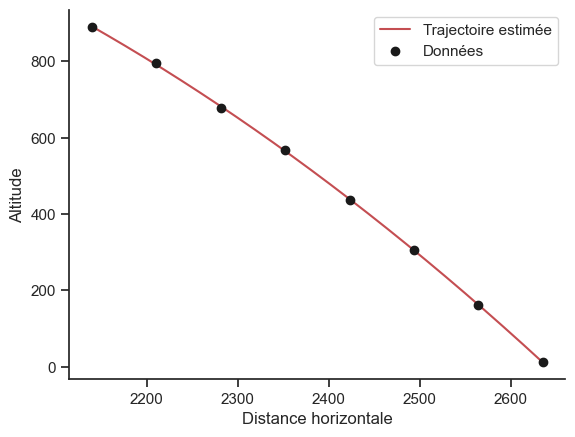

In [133]:
a0, a1, a2 = alpha[:,0]

xf = np.linspace(x[0], x[-1], 1000)

y = a0 + a1*xf + a2*xf**2

plt.plot(xf,y, 'r', label='Trajectoire estimée')
plt.plot(x, Y, 'ko', label='Données')
plt.ylabel('Altitude')
plt.xlabel('Distance horizontale')
plt.legend()
plt.show()


Figure 1. Données du projectile et trajectoire estimée du projectile de la bataille navale. La trajectoire estimée correspond bien aux données fournies.

### d)

<i>Obtenez la position d’impact du projectile (à y = 0) en résolvant l’équation quadratique (2.2.3) pour x à l’aide
d’une implémentation personnelle de la méthode de la bissection. Comparez votre solution avec celle obtenue en
résolvant cette même équation analytiquement. Considérant que votre embarcation se situe à la position (x, y) =
(0, 0), quelle est la distance horizontale vous séparant du point d’impact ?
 </i>

In [134]:
def f(x):
    return a0 + a1*x + a2*x**2

def prochains_points(xA, xB): # À cause qu'on peut interpréter l'allure de la fonction (fonction 2D), il n'est pas nécessaire d'implémenter les vérifications comme f(xA)f(xB) < 0.
    xC = (xA+xB)/2
    if f(xA) * f(xC) > 0:
        xA = xC
    else:
        xB = xC
    return xA, xB, xC

xA, xB = 2500, 2800 # À partir du graphique en c)
xCp = np.inf
while True:
    xA, xB, xC = prochains_points(xA, xB)
    if abs(xC-xCp) < 1e-16:
        break
    xCp = xC

print(f'Valeur obtenue avec la méthode de la bissection: {round(xC,5)}')

xminus = (-a1- np.sqrt(a1**2-4*a2*a0))/(2*a2)
print(f'Valeur obtenue analytiquement: {round(xminus,5)}')



Valeur obtenue avec la méthode de la bissection: 2640.04478
Valeur obtenue analytiquement: 2640.04478


## TP2.3 Modèle épidémiologique SIR sur réseau

### a)

Trouvez analytiquement toutes les solutions de l’équation cubique (2.3.3).

$u = \frac{1}{[1+T(\kappa - 1)(1-u)]^2} \equiv f(u)$ où $\kappa$ = 5

Posons aussi:
u = (1-x)

$(1-x)[1+T(5 - 1)(1-1+x)]^2 = 1$

$(1-x)(1+8Tx+16T^2x^2) = 1$

$(1-1+8Tx+16T^2x^2-x-8Tx^2-16T^2x^3) = 0$

$x(8T+16T^2x-1-8Tx-16T^2x^2) = 0$

$x((8T-1)+x(16T^2-8T)-x^2(16T^2)) = 0$


les coefficients de chaque puissance de cette équation quadratique sont:

$a = -16T^2$

$b = 16T^2-8T$

$c = 8T-1$


$\frac{-b \pm \sqrt{b^2-4ac}}{2a}$ où $b^2-4ac = (16T^2-8T)^2+4(16T^2)(8T-1) = 256T^4+256T^3$

$\frac{(8T-16T^2) \pm \sqrt{256T^4+256T^3}}{-32T^2}$



$x_1 = 0$

$x_2 = \frac{(2T-1) + 2\sqrt{T^2+T}}{4T}$

$x_3 = \frac{(2T-1) - 2\sqrt{T^2+T}}{4T}$

On peut finalement revenir en fonction de u:

$u_1 = 1$

$u_2 = \frac{(1-2T) - 2\sqrt{T^2+T}}{4T}+1$

$u_3 = \frac{(1-2T) + 2\sqrt{T^2+T}}{4T}+1$

### b)

Démontrez laquelle des solutions obtenues précédemment (ou une combinaison de celles-ci) correspond à u, soit
la solution recherchée de l’équation (2.3.3).


La solution recherchée sera soit $u_1$, $u_2$, $u_3$ ou une combinaison des trois. 

Comme on cherche la valeur de $u$ la plus petite pour tout T dans l'intervalle $[0,1]$ et que $u_1$ ne varie pas en fonction de T, on posera cette valeur comme la plus petite à moins que les deux autres solutions ne soit encore plus petite. On veut donc trouver le point d'inflexion entre $u_1$ et ces deux solutions s'il y en a:

$u_2 = u_1$

$\frac{(1-2T) - 2\sqrt{T^2+T}}{4T}+1 = 1$

$2\sqrt{T^2+T} = (1-2T)$

$T^2 + T = 1/4 - T + T^2$

$T = 1/8$

Donc, $u_2$ diminue sur l'intervalle de T et devient plus petit que $u_1$ à partir de T=1/8.



$\lim_{T\to\infty}u_3(T) = \frac{T((1/T)-2) + 2T\sqrt{1+1/T}}{4T}+1 = 1+ \frac{((1/\infty)-2)+2\sqrt{1+1/\infty}}{4} = 1+ \frac{-2+2}{4}= 1$

Comme $u_3$ donne 1 lorsque T tend vers l'infini et que cette solution est toujours plus grande que 1 avant, nous pouvons éliminer $u_3$ des possibilités sur l'intervalle à l'étude.


Ainsi, la combinaison de solutions pour que $u$ soit toujours la plus petite solution non négative en fonction de T est $u_1$ pour $[0 \le T \le 0.125]$ et $u_2$ pour $[0.125<T \le 1]$

### c)

Tracez $R_∞$ en fonction de T et identifiez tout changement qualitatif de $R_∞$. Comment interprétez-vous ce
changement (ou cette absence de changement) ?

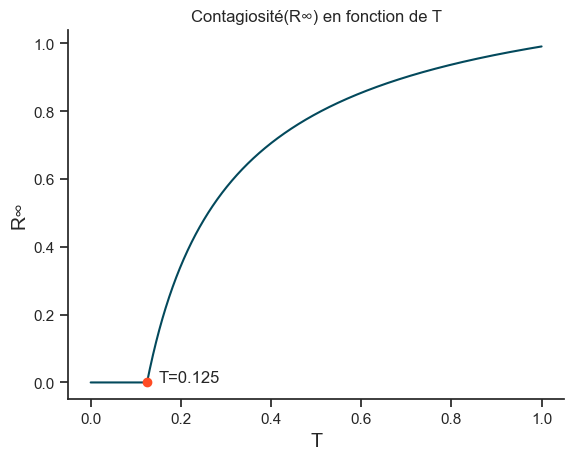

In [135]:
import numpy as np
import matplotlib.pyplot as plt


def R(T,u):
	return 1-((1-T*(1-u))/(1+(4*T*(1-u))))


def u_2(T):
	return 1 - ( 2*T-1 + 2*np.sqrt(T**2+T) )/( 4*T )

def u_1(T):
	return np.ones(T.shape)

x1 = np.linspace(0,0.125,1000)
x2 = np.linspace(0.125,1,1000)

y1 = u_1(x1)
y2 = u_2(x2)

u = np.concatenate((y1,y2)) 
T = np.concatenate((x1,x2))


fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(T,R(T,u), color="#03495C")
ax.plot(0.125, 0, marker='o', color="#FF4C24")
plt.text(0.150,0,'T=0.125')
ax.set_xlabel("T", fontsize=14)
ax.set_ylabel("R∞", fontsize=14)
ax.set_title("Contagiosité(R∞) en fonction de T")
plt.show()

Figure 2. On peut voir sur ce graphique que tant que la valeur de T n'est pas au-dessus de 0.125, la contagiosité est nulle dans la population. cela est du au fait que la probabilité qu'une personne en infecte une autre est trop faible pour permettre la propagation de l'agent pathogène. Par contre, une fois que cette valeur de T est dépassée, la contagiosité se met à augmenter rapidement jusqu'à atteindre un maximum de 0.99 lorsque T vaut 1.

### d)

Résolvez numériquement l’équation (2.3.3) à l’aide d’implémentations personnelles de la méthode par relaxation
et de la méthode de Newton-Raphson pour 20 valeurs de T uniformément distribuées dans l’intervalle [0, 1]. Illustrez
vos résultats à l’aide d’un graphique comparant les solutions analytiques (indiquées avec des lignes de couleurs
distinctes) aux solutions numériques obtenues avec différentes valeurs initiales de l’algorithme (symboles ; choisissez
bien vos symboles pour que vos solutions soient bien visibles). Arrivez-vous à obtenir les trois solutions identifiées
en a ? Pourquoi ? Considérez tracer l’équation (2.3.3) de même que la dérivée de f(u) en fonction de u et ce, pour
quelques valeurs de T, pour appuyer vos conclusions. Vous pouvez aussi tracer les itérations successives de chacune
des méthodes afin d’illustrer la manière dont elles convergent vers l’une ou l’autre des solutions (ex. : tracer un
diagramme en toile d’araignée).

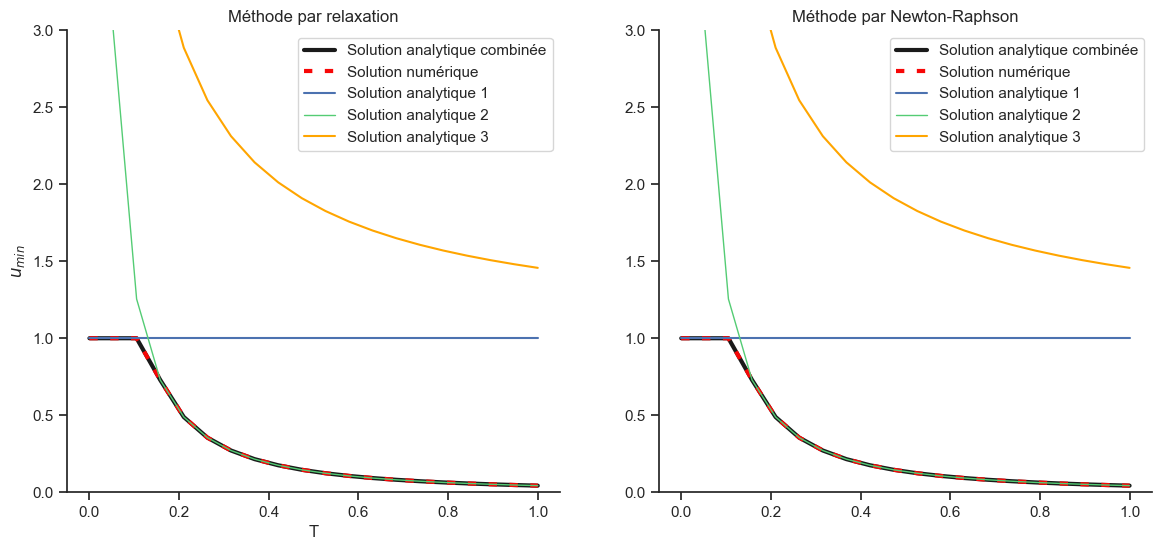

In [141]:
def f_u(T, u):
	return (1)/( (1 + 4*T -4*T*u)**2 )

def df_u(T,u):
	return (8*T)/(( 1-4*T*(u-1) )**3)

def f_u2(T, u):
	return (1)/( (1 + 4*T -4*T*u)**2 )-u

def df_u2(T,u):
	return (8*T)/(( 1-4*T*(u-1) )**3)-1

def u_3(T):
	return 1 - ( 2*T-1 - 2*np.sqrt(T**2+T) )/( 4*T )

def u_2(T):
	return 1 - ( 2*T-1 + 2*np.sqrt(T**2+T) )/( 4*T )

def u_1(T):
	return np.ones(T.shape)

def R(T,u):
	return 1 - ( 1-T*(1-u))/( 1+4*T*(1-u) )

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

# relaxation 
FU = []
for T in np.linspace(0,1,20):
    u = 0.1
    for i in range(1000):
        u = f_u(T, u)
    FU.append(u)

T = np.linspace(0,1,20)
FU_analytique = []
for t in T:
    if t > 0.125:
        FU_analytique.append(u_2(t))
    else:
        FU_analytique.append(u_1(t))

FU = np.array(FU)
ax[0].set_title("Méthode par relaxation")
ax[0].plot(T, FU_analytique ,color='k', label='Solution analytique combinée', linewidth=3)
ax[0].plot(T, FU, linestyle=(0,(2,3)), color="#f70707", label= 'Solution numérique', linewidth=3)
ax[0].plot(T, u_1(T), color='b', label='Solution analytique 1')
ax[0].plot(T, u_2(T), color='#54cc74', label='Solution analytique 2', linewidth=1)
ax[0].plot(T, u_3(T), color = 'orange', label='Solution analytique 3')
ax[0].set_ylim(0,3)
ax[0].set_xlabel("T")
ax[0].set_ylabel("$u_{min}$")
ax[0].legend(loc='upper right')

# Newton-Raphson
ax[1].set_title("Méthode par Newton-Raphson")
ax[1].set_ylim(0,3)

FU = []
for T in np.linspace(0,1,20):
    u = 0.5
    for i in range(100):
        if df_u2(T,u) == 0:
            break
        u = u - f_u2(T, u)/df_u2(T,u)
    FU.append(u)

T = np.linspace(0,1,20)
FU = np.array(FU)
ax[1].plot(T, FU_analytique ,color='k', label='Solution analytique combinée', linewidth=3)
ax[1].plot(T, FU, linestyle=(0,(2,3)), color="#f70707", label= 'Solution numérique', linewidth=3)
ax[1].plot(T, u_1(T), color='b', label='Solution analytique 1')
ax[1].plot(T, u_2(T), color='#54cc74', label='Solution analytique 2', linewidth=1)
ax[1].plot(T, u_3(T), color = 'orange', label='Solution analytique 3')
ax[1].legend(loc='upper right')
plt.show()

Figure 3. Solutions pour $u$ minimale selon $T$ obtenues pour les 2 méthodes étudiées. La méthode par relaxation et la méthode Newton-Raphson donne les mêmes valeurs de $u_{min}$ que celles obtenues analytiquement. 

##### Investigation des résultats ci-haut:

Vérification méthode relaxation:

Résultat méthode par relaxation: 0.5252551286
Résultat théorique: 0.5252551286


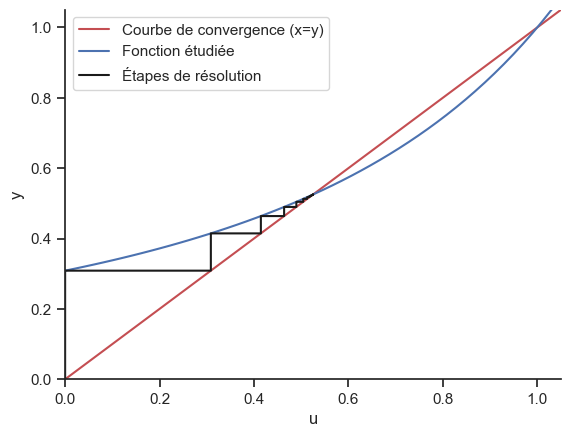

In [137]:
fig = plt.figure()
T = 0.2
point_list = []
x0 = 0
point_list.append((x0, 0))
for i in range(1000):
    x,y = point_list[-1]
    y = f_u(T, x)

    point_list.append((x,y))
    x = y
    point_list.append((x,y))
print(f'Résultat méthode par relaxation: {round(y,10)}')
print(f'Résultat théorique: {round(u_2(T),10)}')
point_list = np.array(point_list)
X,Y = point_list.T
xy = np.linspace(0,2,100)
plt.ylim(0,y*2)
plt.xlim(0,x*2)
plt.plot(xy,xy, 'r', label='Courbe de convergence (x=y)')
plt.plot(xy, f_u(T, xy), 'b', label='Fonction étudiée')
plt.plot(X,Y, 'k', label= 'Étapes de résolution')
plt.xlabel('u')
plt.ylabel('y')
plt.legend()
plt.show()

Figure 4.

Résultat méthode par Newton-Raphson: 0.0512946205
Résultat théorique: 1
Résultat théorique: 0.0512946205
Résultat théorique: 1.504260935


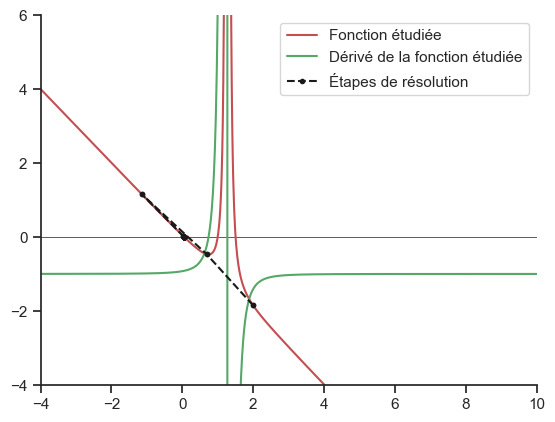

In [138]:
fig = plt.figure()
t = 0.9
point_list = []
x0 = 2
point_list.append((x0, f_u(t, x0)))
for i in range(100):
    x,y = point_list[-1]

    y = x - f_u2(t, x)/df_u2(t,x)
    point_list.append((x,y))
    x = y
    point_list.append((x,y))
print(f'Résultat méthode par Newton-Raphson: {round(y,10)}')
print(f'Résultat théorique: {1}')
print(f'Résultat théorique: {round(u_2(t),10)}')
print(f'Résultat théorique: {round(u_3(t),10)}')
point_list = np.array(point_list)
X,Y = point_list.T
xy = np.linspace(-4,10,1000)
plt.ylim(-4,6)
plt.xlim(-4,10)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.plot(xy, f_u2(t, xy), 'r', label='Fonction étudiée')
plt.plot(xy, df_u2(t, xy), 'g', label='Dérivé de la fonction étudiée')
plt.plot(X,f_u2(t, X), 'k.', linestyle='--', label= 'Étapes de résolution')
plt.legend()
plt.show()

Résultat méthode par Newton-Raphson: 1.0
Résultat théorique: 1
Résultat théorique: 0.0779491347
Résultat théorique: 1.6363365796


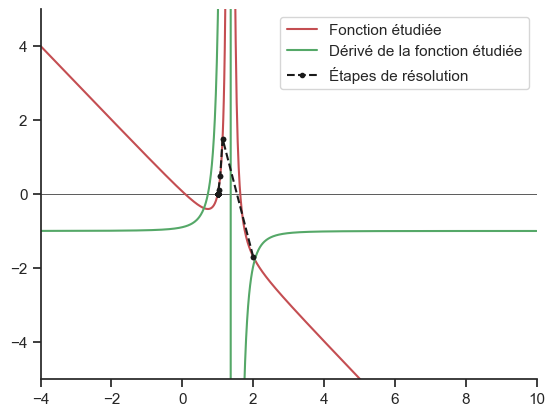

In [139]:
fig = plt.figure()
t = 0.7
point_list = []
x0 = 2
point_list.append((x0, f_u(t, x0)))
for i in range(100):
    x,y = point_list[-1]

    y = x - f_u2(t, x)/df_u2(t,x)
    point_list.append((x,y))
    x = y
    point_list.append((x,y))
print(f'Résultat méthode par Newton-Raphson: {round(y,10)}')
print(f'Résultat théorique: {1}')
print(f'Résultat théorique: {round(u_2(t),10)}')
print(f'Résultat théorique: {round(u_3(t),10)}')
point_list = np.array(point_list)
X,Y = point_list.T
xy = np.linspace(-4,10,1000)
plt.ylim(-5,5)
plt.xlim(-4,10)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.plot(xy, f_u2(t, xy), 'r', label='Fonction étudiée')
plt.plot(xy, df_u2(t, xy), 'g', label='Dérivé de la fonction étudiée')
plt.plot(X,f_u2(t, X), 'k.', linestyle='--', label= 'Étapes de résolution')
plt.legend()
plt.show()